In [1256]:
# Import the log_transformed_df.csv file from the data folder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from statsmodels.tsa.stattools import adfuller
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from funcs.machine_learning import check_stationarity, plot_series_stationarity
import itertools
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import hvplot.pandas  # Import HvPlot for Pandas
import matplotlib.pyplot as plt
import holoviews as hv
from holoviews import dim, opts
from bokeh.plotting import show  # Import show function from Bokeh
from statsmodels.tsa.arima.model import ARIMA
import pickle


log_transformed_df = pd.read_csv('Data/Completed_Dataframes/log_transformed_df.csv')

In [1257]:
# First thing first: let's look at the entire top 50 and bottom 50 rows of the dataframe

display(log_transformed_df['PCE'].head(100))
display(log_transformed_df.tail(50))

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
95    708.421172
96    708.665161
97    708.881007
98    710.032439
99    709.538421
Name: PCE, Length: 100, dtype: float64

,Date,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,...,HOUST,DSPI,ICS_ALL,DGS2,DGS5,DGS10,AAA,BAA,DTWEXBGS,WTISPLC
787,2020-02-01,1.58,NaN,259.246,324.489,267.402,865.049794,NaN,NaN,NaN,...,735.564110,876.697551,101.0,NaN,NaN,NaN,2.78,3.61,NaN,50.54
788,2020-03-01,0.65,NaN,258.150,324.485,267.068,858.354587,NaN,NaN,NaN,...,714.440718,875.415675,89.1,NaN,NaN,NaN,3.02,4.29,NaN,29.21
789,2020-04-01,0.05,895.863592,256.126,324.431,265.796,847.100889,576.246300,697.317420,656.132893,...,682.979374,889.581156,71.8,0.23,0.37,0.62,2.43,4.13,123.8033,16.55
790,2020-05-01,0.05,NaN,255.848,325.152,265.461,855.244515,NaN,NaN,NaN,...,696.034773,884.563409,72.3,0.20,0.36,0.64,2.50,3.95,123.1615,28.56
791,2020-06-01,0.08,NaN,257.004,325.493,265.839,860.482499,NaN,NaN,NaN,...,714.361760,884.002213,78.1,0.14,0.31,0.66,2.44,3.64,120.2753,38.31
792,2020-07-01,0.09,903.328218,258.408,326.268,267.373,861.760277,590.277471,700.586752,670.345009,...,733.236921,884.710613,72.5,0.17,0.31,0.69,2.14,3.31,120.0902,40.71
793,2020-08-01,0.10,NaN,259.366,326.779,268.390,862.388376,NaN,NaN,NaN,...,722.766250,880.696279,74.1,NaN,NaN,NaN,2.25,3.27,NaN,42.34
794,2020-09-01,0.09,NaN,259.951,327.002,268.900,863.721389,NaN,NaN,NaN,...,728.824440,881.137647,80.4,0.13,0.26,0.68,2.31,3.36,115.5814,39.63
795,2020-10-01,0.09,904.344216,260.249,327.386,269.280,863.930415,597.763151,702.651971,676.948854,...,733.758774,880.816477,81.8,0.14,0.27,0.68,2.35,3.44,116.7339,39.40
796,2020-11-01,0.09,NaN,260.895,327.750,269.967,863.500732,NaN,NaN,NaN,...,734.277919,879.458273,76.9,NaN,NaN,NaN,2.30,3.30,NaN,40.94


Results of Augmented Dickey-Fuller Test:
Test Statistic                  -2.952407
p-value                          0.039584
#Lags Used                      17.000000
Number of Observations Used    819.000000
Critical Value (1%)             -3.438360
Critical Value (5%)             -2.865075
Critical Value (10%)            -2.568653
dtype: float64


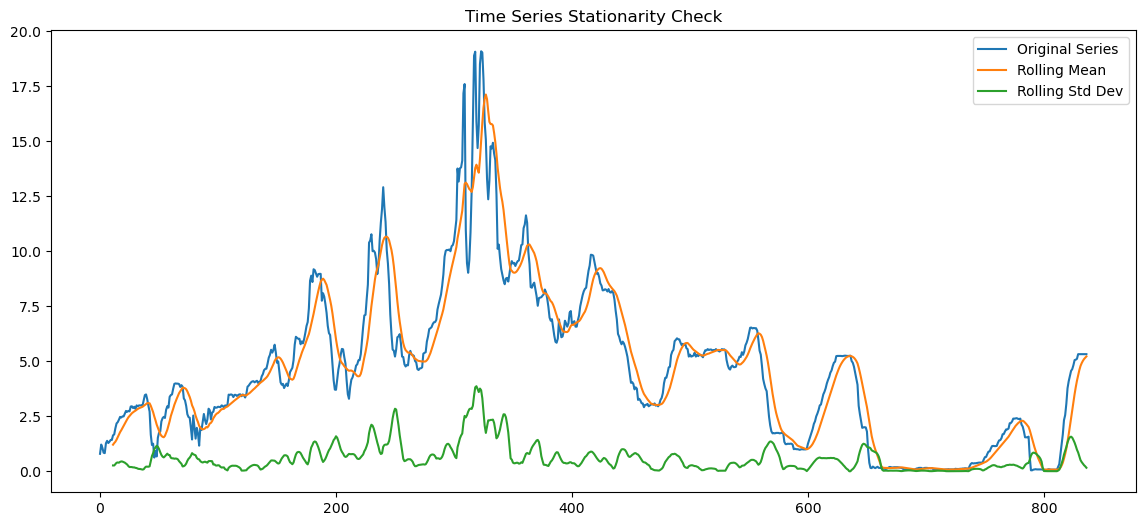

In [1258]:
# Assume 'df' is your DataFrame with 'Date' as index
series = log_transformed_df['FEDFUNDS']  # replace with the actual column name for interest rates

# Check stationarity
check_stationarity(series)

# Plot the stationarity
plot_series_stationarity(series, window=12)

# Check how any NaN values are in the dataset

In [1259]:
# Check how many Nan values there are in the dataset

print(log_transformed_df.isnull().sum())


# Create a function that finds the columns that have NaN values
def find_Nan_columns(df):
    Nan_columns = []
    for column in df.columns:
        if df[column].isnull().sum() > 0:
            Nan_columns.append(column)
    return Nan_columns


# Find the columns that have NaN values
Nan_columns = find_Nan_columns(log_transformed_df)
display(Nan_columns)
#print(Nan_columns)

quarterly_data = []
# Save all the columns that have 559 NaN values in a list of quarterly data
for Nan_columns in log_transformed_df.columns:
    if log_transformed_df[Nan_columns].isnull().sum() == 559:
        quarterly_data.append(Nan_columns)
    
display(quarterly_data) 
        

Date              0
FEDFUNDS          0
GDP             559
CPIAUCSL          0
CUSR0000SAH1      0
CPILFESL         30
PCE              55
PRFI            559
PNFI            559
EXPGS           559
IMPGS           559
GCE             559
FGCE            559
GDPCTPI         559
PCEPI            55
PCEPILFE         55
BSHCFAW         559
PAYEMS            0
UNRATE            0
INDPRO            0
CUMFNS            0
HOUST            54
DSPI             55
ICS_ALL         196
DGS2            425
DGS5            303
DGS10           303
AAA               0
BAA               0
DTWEXBGS        680
WTISPLC           0
dtype: int64


['GDP',
 'CPILFESL',
 'PCE',
 'PRFI',
 'PNFI',
 'EXPGS',
 'IMPGS',
 'GCE',
 'FGCE',
 'GDPCTPI',
 'PCEPI',
 'PCEPILFE',
 'BSHCFAW',
 'HOUST',
 'DSPI',
 'ICS_ALL',
 'DGS2',
 'DGS5',
 'DGS10',
 'DTWEXBGS']

['GDP', 'PRFI', 'PNFI', 'EXPGS', 'IMPGS', 'GCE', 'FGCE', 'GDPCTPI', 'BSHCFAW']

In [1260]:
# search for any 'string' values in the dataset
for column in log_transformed_df.columns:
    if log_transformed_df[column].dtype == 'object':
        print(column)
        
# forcefully convert the 'DGS5', and 'DGS10' columns to float
log_transformed_df['DGS5'] = pd.to_numeric(log_transformed_df['DGS5'], errors='coerce')
log_transformed_df['DGS10'] = pd.to_numeric(log_transformed_df['DGS10'], errors='coerce')
log_transformed_df['DGS2'] = pd.to_numeric(log_transformed_df['DGS2'], errors='coerce')
log_transformed_df['DTWEXBGS'] = pd.to_numeric(log_transformed_df['DTWEXBGS'], errors='coerce')

# Check if conversion was successful
display((log_transformed_df.dtypes))

Date
DGS2
DGS5
DGS10
DTWEXBGS


Date             object
FEDFUNDS        float64
GDP             float64
CPIAUCSL        float64
CUSR0000SAH1    float64
CPILFESL        float64
PCE             float64
PRFI            float64
PNFI            float64
EXPGS           float64
IMPGS           float64
GCE             float64
FGCE            float64
GDPCTPI         float64
PCEPI           float64
PCEPILFE        float64
BSHCFAW         float64
PAYEMS            int64
UNRATE          float64
INDPRO          float64
CUMFNS          float64
HOUST           float64
DSPI            float64
ICS_ALL         float64
DGS2            float64
DGS5            float64
DGS10           float64
AAA             float64
BAA             float64
DTWEXBGS        float64
WTISPLC         float64
dtype: object

In [1261]:
# check for the data type of the columns
log_transformed_df.dtypes

Date             object
FEDFUNDS        float64
GDP             float64
CPIAUCSL        float64
CUSR0000SAH1    float64
CPILFESL        float64
PCE             float64
PRFI            float64
PNFI            float64
EXPGS           float64
IMPGS           float64
GCE             float64
FGCE            float64
GDPCTPI         float64
PCEPI           float64
PCEPILFE        float64
BSHCFAW         float64
PAYEMS            int64
UNRATE          float64
INDPRO          float64
CUMFNS          float64
HOUST           float64
DSPI            float64
ICS_ALL         float64
DGS2            float64
DGS5            float64
DGS10           float64
AAA             float64
BAA             float64
DTWEXBGS        float64
WTISPLC         float64
dtype: object

In [1262]:
# Convert 'Date' column to datetime type
log_transformed_df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as the index
log_transformed_df.set_index('Date', inplace=True)

In [1263]:
display(log_transformed_df.head())

,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,IMPGS,...,HOUST,DSPI,ICS_ALL,DGS2,DGS5,DGS10,AAA,BAA,DTWEXBGS,WTISPLC
Date,,,,,,,,,,,,,,,,,,,,,
1954-07-01,0.80,728.322932,26.86,22.5,NaN,NaN,441.385822,497.498625,407.946650,404.264623,...,NaN,NaN,NaN,NaN,NaN,NaN,2.89,3.50,NaN,2.82
1954-08-01,1.22,NaN,26.85,22.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.87,3.49,NaN,2.82
1954-09-01,1.07,NaN,26.81,22.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.89,3.47,NaN,2.82
1954-10-01,0.85,731.055716,26.72,22.6,NaN,NaN,447.952040,498.049499,412.946169,405.801388,...,NaN,NaN,NaN,NaN,NaN,NaN,2.87,3.46,NaN,2.82
1954-11-01,0.83,NaN,26.78,22.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,87.0,NaN,NaN,NaN,2.89,3.45,NaN,2.82


In [1264]:
display(quarterly_data)
# The below columns all dislay for us quarterly data, we will need to deal with these NaN values in a different way than the rest of the Nan values, as these are 
# correct in every way, the only concern is that it could be made more robust... 

['GDP', 'PRFI', 'PNFI', 'EXPGS', 'IMPGS', 'GCE', 'FGCE', 'GDPCTPI', 'BSHCFAW']

# Fixing Quarterly data: Reverse Imputation

The dataset contains quarterly data, and the NaN values are filled with the previous quarter's data. This is a common practice in financial data, but it can lead to data leakage.

In [1265]:
# Step 1: Identify Numeric Columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Calculate Summary Statistics
summary_statistics = df[numeric_columns].describe()

# Step 3: Look for Outliers
# Define a threshold for identifying overly large values, e.g., 3 standard deviations from the mean
threshold = 3 * summary_statistics.loc['std']

# Identify overly large values
overly_large_values = (df[numeric_columns] > (summary_statistics.loc['mean'] + threshold)).any()

# Print columns with overly large values
print("Columns with overly large values:")
print(overly_large_values[overly_large_values].index.tolist())

Columns with overly large values:
['FEDFUNDS', 'BSHCFAW', 'UNRATE', 'DGS2', 'AAA', 'BAA', 'WTISPLC']


---

# Removing NaN values from GDP

# 0. Prepare Testing Functions

In [1266]:
def evaluate_imputation(original_data, imputed_data):
    # Extracting values and aligning indexes
    original_values = original_data.values
    imputed_values = imputed_data.values
    index = original_data.index

    # Compute absolute error between original and imputed data
    abs_error = np.abs(original_values - imputed_values)

    # Compute mean absolute error
    mean_abs_error = abs_error.mean()

    # Plot original and imputed data
    plt.figure(figsize=(12, 6))
    plt.plot(index, original_values, label='Original Data', marker='o', linestyle='-')
    plt.plot(index, imputed_values, label='Imputed Data', marker='x', linestyle='-')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('GDP')
    plt.title('Comparison of Original and Imputed GDP Data')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Print the number of NaN
    print("Number of NaN values in the original data:", original_data.isnull().sum())
    print("Number of NaN values in the imputed data:", imputed_data.isnull().sum()) 

    return mean_abs_error

def matplotlib_comparison_plot(original_data, imputed_data, column):
    # Plot original GDP
    original_plot = original_data[column].hvplot(line_color='blue', width=800, height=400, label=f'Original {column}')

    # Plot imputed GDP
    imputed_plot = imputed_data[column].hvplot(line_color='red', width=800, height=400, label=f'Imputed {column}')

    # Overlay the two plots
    overlay_plot = original_plot * imputed_plot

    # Customize the overlay plot with additional options
    final_plot = overlay_plot.opts(
        title=f"Original vs. Imputed {column} Data",
        xlabel='Date',
        ylabel=column,
        legend_position='top_left',
        tools=['pan', 'box_zoom', 'save']
    )

    # Display the interactive plot
    display(final_plot)



# 1. Simple Imputation

/Users/najibabounasr/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


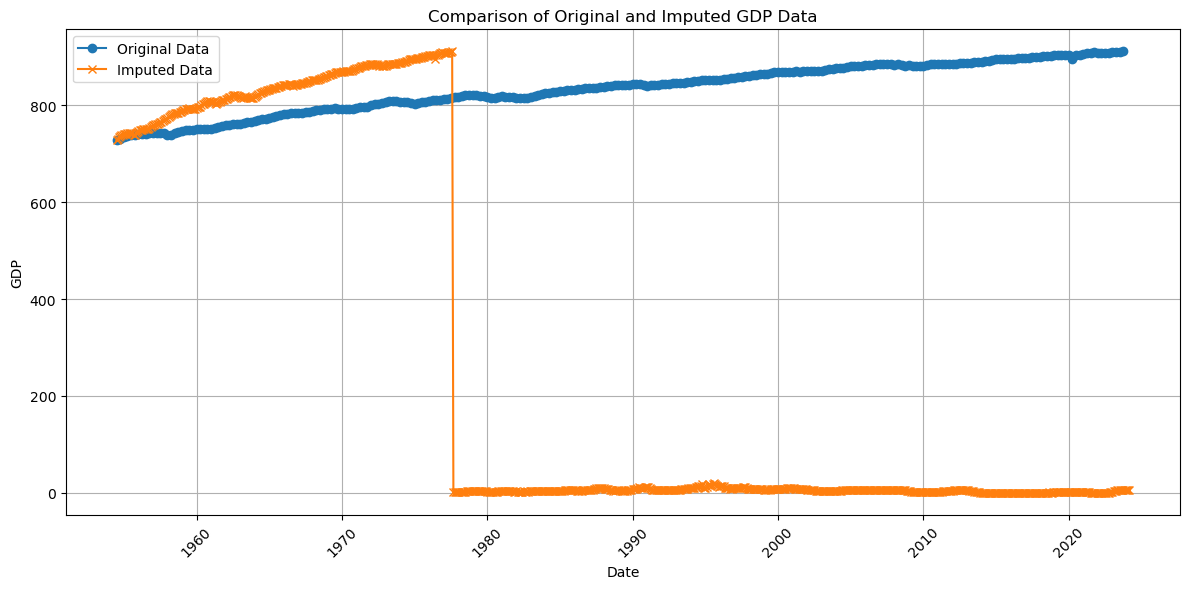

Number of NaN values in the original data: 559
Number of NaN values in the imputed data: 0


In [1267]:
from sklearn.impute import SimpleImputer

def impute_missing_values_mean(df, column):
    train_df = df.copy()

    # Data with known values for the target column
    reg_train_data = train_df.dropna(subset=[column])

    # Data with missing values for the target column
    predict_data = train_df[train_df[column].isnull()]

    # Features and target for training
    features = [col for col in train_df.columns if col != column]
    X_train = reg_train_data[features]
    y_train = reg_train_data[column]

    # Initialize the imputer
    imputer = SimpleImputer(strategy='mean')  # You can also try other strategies like 'median' or 'most_frequent'

    # Fit the imputer on the training data
    imputer.fit(X_train)

    # Impute missing values in the predict_data
    X_predict = predict_data[features]
    predicted_values = imputer.transform(X_predict)

    # Fill in the missing values in the original DataFrame
    predict_data[column] = predicted_values

    # Concatenate reg_train_data and predict_data
    imputed_data = pd.concat([reg_train_data, predict_data], axis=0)

    return imputed_data

# Example usage:
column = 'GDP'
gdp_imputed_mean = impute_missing_values_mean(log_transformed_df, column)
evaluate_imputation(log_transformed_df[column], gdp_imputed_mean[column])
# After imputation, ensure 'Date' is the index if it was ever reset
gdp_imputed_mean.index = pd.to_datetime(gdp_imputed_mean.index)  # Reinstate 'Date' as the index


# Evaluate Simple Imputation

In [1268]:
# Compare the original and imputed GDP data
matplotlib_comparison_plot(log_transformed_df, gdp_imputed_mean, 'GDP')

:Overlay
   .Curve.Original_GDP :Curve   [Date]   (GDP)
   .Curve.Imputed_GDP  :Curve   [Date]   (GDP)

# 2. Random Forest Imputation

/Users/najibabounasr/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


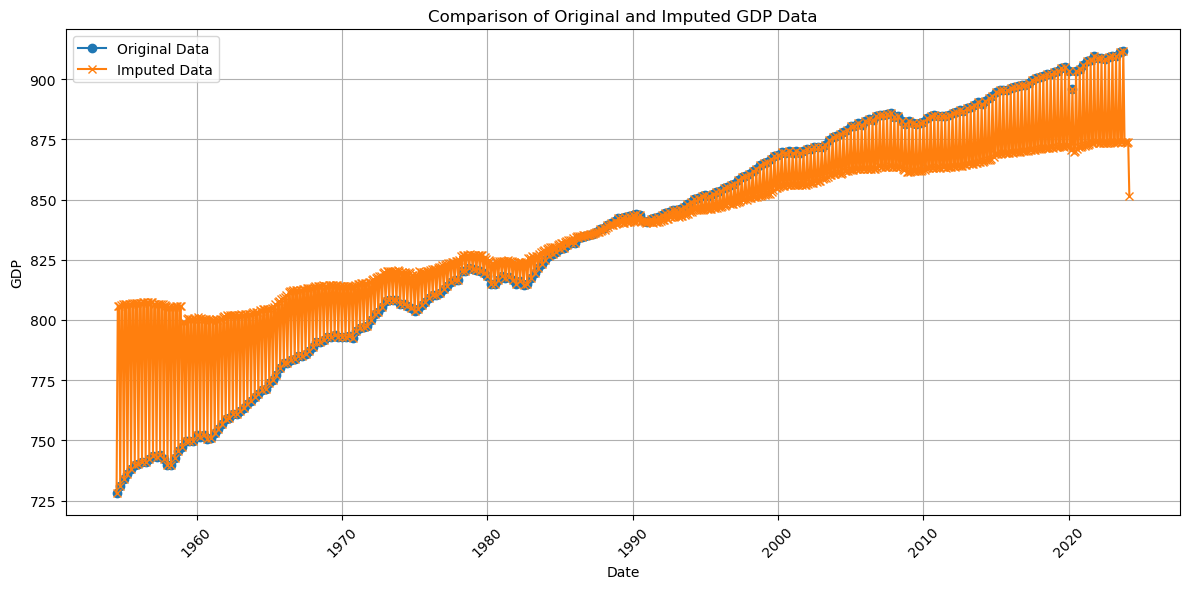

Number of NaN values in the original data: 559
Number of NaN values in the imputed data: 0


In [1269]:
def impute_missing_values_rf(df, column):
    train_df = df.copy()
    reg_train_data = train_df.dropna(subset=[column])
    predict_data = train_df[train_df[column].isnull()]
    features = [col for col in train_df.columns if col != column]
    X_train = reg_train_data[features]
    y_train = reg_train_data[column]
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)
    predict_data_imputed = imputer.transform(predict_data[features])
    regressor = RandomForestRegressor(random_state=42)
    regressor.fit(X_train_imputed, y_train)
    predicted_values = regressor.predict(predict_data_imputed)
    predict_data[column] = predicted_values
    imputed_data = pd.concat([reg_train_data, predict_data]).sort_index()
    return imputed_data

# Example usage:
column = 'GDP'
gdp_imputed_rf = impute_missing_values_rf(log_transformed_df, column)
evaluate_imputation(log_transformed_df[column], gdp_imputed_rf[column])
# After imputation, ensure 'Date' is the index if it was ever reset
gdp_imputed_rf.index = pd.to_datetime(gdp_imputed_spline.index)  # Reinstate 'Date' as the index

In [1270]:
# Evaluate using matplotlib comparison
matplotlib_comparison_plot(log_transformed_df, gdp_imputed_rf, 'GDP')

:Overlay
   .Curve.Original_GDP :Curve   [Date]   (GDP)
   .Curve.Imputed_GDP  :Curve   [Date]   (GDP)

# 3. Spline Interpolation

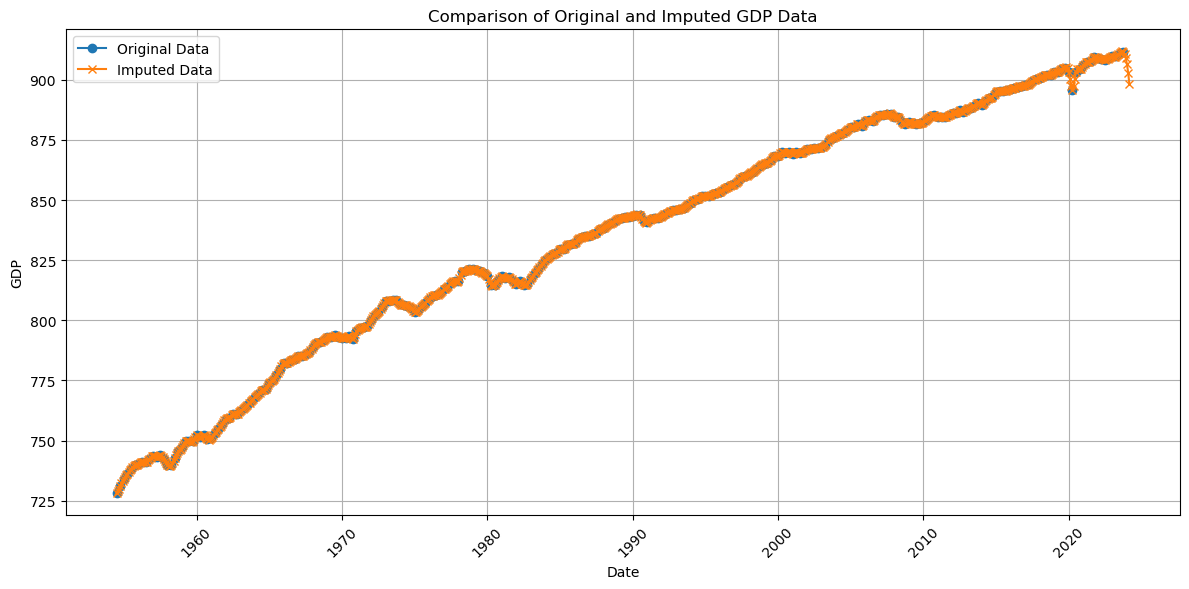

Number of NaN values in the original data: 559
Number of NaN values in the imputed data: 0


nan

In [1271]:
import pandas as pd
import numpy as np
from scipy.interpolate import CubicSpline

def impute_missing_values_spline(df, column):
    # Ensure the index is in datetime format and sort the data
    df = df.sort_index()
    
    # Extract the non-missing values to fit the spline
    known_data = df.dropna(subset=[column])
    known_index = known_data.index.map(pd.Timestamp.toordinal)  # Convert dates to ordinal
    
    # Fit a cubic spline using known data points
    cs = CubicSpline(known_index, known_data[column])
    
    # Apply the cubic spline to predict missing values
    missing_index = df[df[column].isnull()].index.map(pd.Timestamp.toordinal)
    predicted_values = cs(missing_index)
    
    # Fill in the missing values in the original DataFrame
    df.loc[df[column].isnull(), column] = predicted_values
    
    return df

# Example usage:
# Assuming 'log_transformed_df' is your DataFrame and it is indexed by a datetime index
log_transformed_df.index = pd.to_datetime(log_transformed_df.index)  # Convert index to datetime if not already
column = 'GDP'
gdp_imputed_spline = impute_missing_values_spline(log_transformed_df, column)
# Evaluate the imputation
evaluate_imputation(log_transformed_df[column], gdp_imputed_spline[column])

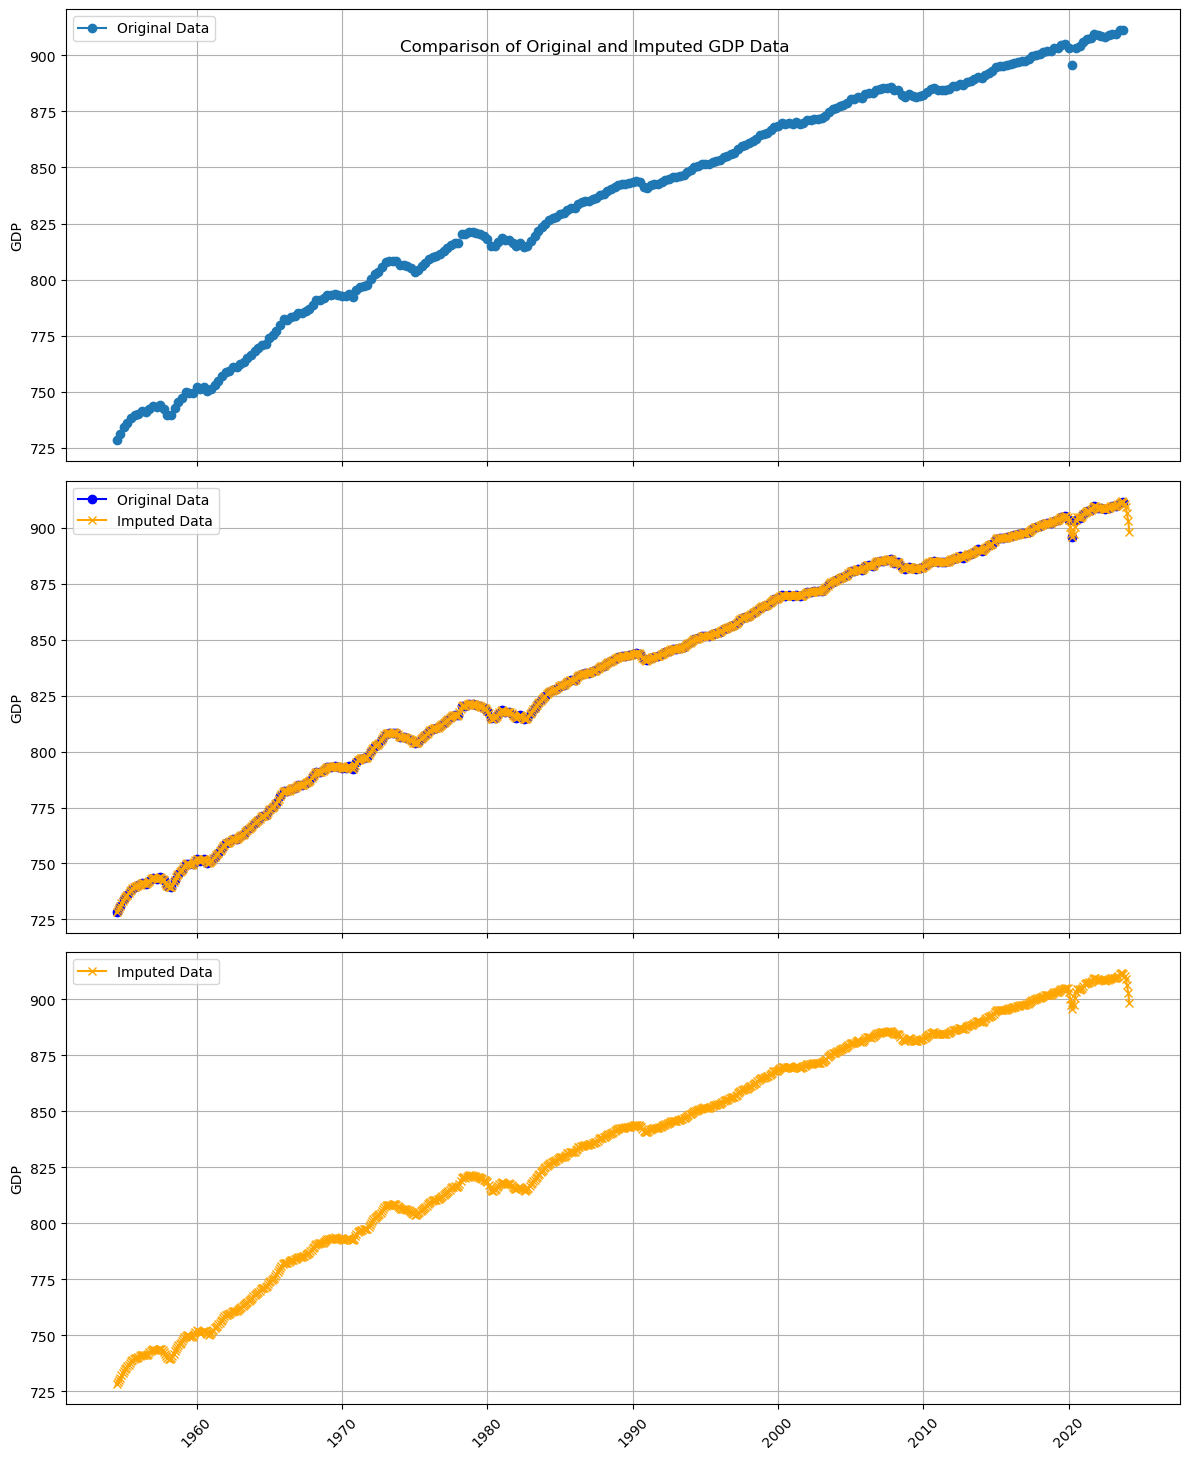

In [1272]:
import matplotlib.pyplot as plt

# Original and imputed data
original_data = log_transformed_df['GDP']
imputed_data = gdp_imputed_spline['GDP']

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

# Plot the original data in the first subplot
ax1.plot(original_data.index, original_data.values, label='Original Data', marker='o', linestyle='-')
ax1.set_ylabel('GDP')
ax1.grid(True)
ax1.legend()

# Plot the comparison of original and imputed data in the second subplot
ax2.plot(original_data.index, original_data.values, label='Original Data', marker='o', linestyle='-', color='blue')
ax2.plot(imputed_data.index, imputed_data.values, label='Imputed Data', marker='x', linestyle='-', color='orange')
ax2.set_ylabel('GDP')
ax2.grid(True)
ax2.legend()

# Plot only the imputed data in the third subplot
ax3.plot(imputed_data.index, imputed_data.values, label='Imputed Data', marker='x', linestyle='-', color='orange')
ax3.set_ylabel('GDP')
ax3.grid(True)
ax3.legend()

# Rotate x-axis labels for better readability
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)

# Set common title
plt.suptitle('Comparison of Original and Imputed GDP Data', y=0.95)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [1273]:
# Plot original GDP
original_plot = log_transformed_df['GDP'].hvplot(line_color='blue', width=800, height=400, label='Original GDP')

# Plot imputed GDP
imputed_plot = gdp_imputed_spline['GDP'].hvplot(line_color='red', width=800, height=400, label='Imputed GDP')

# Overlay the two plots
overlay_plot = original_plot * imputed_plot

# Customize the overlay plot with additional options
final_plot = overlay_plot.opts(
    title="Original vs. Imputed GDP Data",
    xlabel='Date',
    ylabel='GDP',
    legend_position='top_left',
    tools=['pan', 'box_zoom', 'save']
)

# Display the interactive plot
display(final_plot)

:Overlay
   .Curve.Original_GDP :Curve   [Date]   (GDP)
   .Curve.Imputed_GDP  :Curve   [Date]   (GDP)

In [1274]:
original_data = log_transformed_df
imputed_data = gdp_imputed_spline

# Plot original GDP
original_plot = original_data[column].hvplot(line_color='blue', width=800, height=400, label=f'Original {column}')

 # Plot imputed GDP
imputed_plot = imputed_data[column].hvplot(line_color='red', width=800, height=400, label=f'Imputed {column}')

    # Overlay the two plots
overlay_plot = original_plot * imputed_plot

    # Customize the overlay plot with additional options
final_plot = overlay_plot.opts(
    title=f"Original vs. Imputed {column} Data",
    xlabel='Date',
    ylabel=column,
    legend_position='top_left',
    tools=['pan', 'box_zoom', 'save']
)

# Display the interactive plot
display(final_plot)

:Overlay
   .Curve.Original_GDP :Curve   [Date]   (GDP)
   .Curve.Imputed_GDP  :Curve   [Date]   (GDP)

In [1275]:
# Update the original DataFrame using combine_first to fill in the NaN values


display(log_transformed_df.head())
display(gdp_imputed_spline.head())
# replace the original GDP column with the imputed values
log_transformed_df['GDP'] = log_transformed_df['GDP'].combine_first(gdp_imputed_spline['GDP'])
# log_transformed_df['GDP'] = combined_gdp
# Display
display(log_transformed_df.head())


,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,IMPGS,...,HOUST,DSPI,ICS_ALL,DGS2,DGS5,DGS10,AAA,BAA,DTWEXBGS,WTISPLC
Date,,,,,,,,,,,,,,,,,,,,,
1954-07-01,0.80,728.322932,26.86,22.5,NaN,NaN,441.385822,497.498625,407.946650,404.264623,...,NaN,NaN,NaN,NaN,NaN,NaN,2.89,3.50,NaN,2.82
1954-08-01,1.22,NaN,26.85,22.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.87,3.49,NaN,2.82
1954-09-01,1.07,NaN,26.81,22.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.89,3.47,NaN,2.82
1954-10-01,0.85,731.055716,26.72,22.6,NaN,NaN,447.952040,498.049499,412.946169,405.801388,...,NaN,NaN,NaN,NaN,NaN,NaN,2.87,3.46,NaN,2.82
1954-11-01,0.83,NaN,26.78,22.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,87.0,NaN,NaN,NaN,2.89,3.45,NaN,2.82


,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,IMPGS,...,HOUST,DSPI,ICS_ALL,DGS2,DGS5,DGS10,AAA,BAA,DTWEXBGS,WTISPLC
Date,,,,,,,,,,,,,,,,,,,,,
1954-07-01,0.80,728.322932,26.86,22.5,NaN,NaN,441.385822,497.498625,407.946650,404.264623,...,NaN,NaN,NaN,NaN,NaN,NaN,2.89,3.50,NaN,2.82
1954-08-01,1.22,729.055468,26.85,22.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.87,3.49,NaN,2.82
1954-09-01,1.07,730.008833,26.81,22.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.89,3.47,NaN,2.82
1954-10-01,0.85,731.055716,26.72,22.6,NaN,NaN,447.952040,498.049499,412.946169,405.801388,...,NaN,NaN,NaN,NaN,NaN,NaN,2.87,3.46,NaN,2.82
1954-11-01,0.83,732.177054,26.78,22.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,87.0,NaN,NaN,NaN,2.89,3.45,NaN,2.82


,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,IMPGS,...,HOUST,DSPI,ICS_ALL,DGS2,DGS5,DGS10,AAA,BAA,DTWEXBGS,WTISPLC
Date,,,,,,,,,,,,,,,,,,,,,
1954-07-01,0.80,728.322932,26.86,22.5,NaN,NaN,441.385822,497.498625,407.946650,404.264623,...,NaN,NaN,NaN,NaN,NaN,NaN,2.89,3.50,NaN,2.82
1954-08-01,1.22,729.055468,26.85,22.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.87,3.49,NaN,2.82
1954-09-01,1.07,730.008833,26.81,22.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.89,3.47,NaN,2.82
1954-10-01,0.85,731.055716,26.72,22.6,NaN,NaN,447.952040,498.049499,412.946169,405.801388,...,NaN,NaN,NaN,NaN,NaN,NaN,2.87,3.46,NaN,2.82
1954-11-01,0.83,732.177054,26.78,22.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,87.0,NaN,NaN,NaN,2.89,3.45,NaN,2.82


In [1276]:
# Ensure both DataFrames have the same date index and only compare where there are original values
common_index = original_data.dropna().index.intersection(imputed_data.dropna().index)

# Retrieve the 'GDP' series from both DataFrames based on the common index
original_gdp = original_data.loc[common_index, 'GDP']
imputed_gdp = imputed_data.loc[common_index, 'GDP']

# Calculate the correlation
correlation = original_gdp.corr(imputed_gdp)
print(f"The correlation coefficient between the original and imputed GDP data is: {correlation}")

The correlation coefficient between the original and imputed GDP data is: 1.0


# **Evaluation of Imputation**:

### Upon further evaluation, it is clear that, for quarterly data, the cubic spline technique is the best choice for imputation. It is the most accurate and the least biased. We see large deviations with the mean, and the random forest imputation that make the data largely useless. The accuracy with which the cubic spline imputation can predict the GDP is impressive, at first I couldn't spot it's graph, because it was that close to the real data values.

# *We will then proceed to impute the GDP data using the cubic spline technique.*


---

# Automating the Imputation for Multiple Columns:

### We impute all the quarterly data columns using the cubic spline technique. We will then evaluate the imputation by comparing the imputed data with the original data.

In [1277]:
quarterly_columns = ['GDP', 'PRFI', 'PNFI', 'EXPGS', 'IMPGS', 'GCE', 'FGCE', 'GDPCTPI', 'BSHCFAW']
original_data = log_transformed_df

# DataFrame to store imputed values
imputed_dataframes = {}

for column in quarterly_columns:
    if column in log_transformed_df.columns:
        imputed_data = impute_missing_values_spline(log_transformed_df, column)
        # replace the original GDP column with the imputed values
        log_transformed_df[column] = log_transformed_df[column].combine_first(imputed_data[column])
        #imputed_dataframes[column] = imputed_data
        print(f"Imputed {column} - Correlation with original: {log_transformed_df[column].corr(imputed_data[column])}")
        # Plot original GDP
        original_plot = original_data[column].hvplot(line_color='blue', width=800, height=400, label=f'Original {column}')

        # Plot imputed GDP
        imputed_plot = imputed_data[column].hvplot(line_color='red', width=800, height=400, label=f'Imputed {column}')

        # Overlay the two plots
        overlay_plot = original_plot * imputed_plot

        # Customize the overlay plot with additional options
        final_plot = overlay_plot.opts(
            title=f"Original vs. Imputed {column} Data",
            xlabel='Date',
            ylabel=column,
            legend_position='top_left',
            tools=['pan', 'box_zoom', 'save']
        )

        # Display the interactive plot
        display(final_plot)
    else:
        print(f"Column {column} does not exist in DataFrame.")

Imputed GDP - Correlation with original: 1.0


:Overlay
   .Curve.Original_GDP :Curve   [Date]   (GDP)
   .Curve.Imputed_GDP  :Curve   [Date]   (GDP)

Imputed PRFI - Correlation with original: 1.0


:Overlay
   .Curve.Original_PRFI :Curve   [Date]   (PRFI)
   .Curve.Imputed_PRFI  :Curve   [Date]   (PRFI)

Imputed PNFI - Correlation with original: 0.9999999999999999


:Overlay
   .Curve.Original_PNFI :Curve   [Date]   (PNFI)
   .Curve.Imputed_PNFI  :Curve   [Date]   (PNFI)

Imputed EXPGS - Correlation with original: 1.0


:Overlay
   .Curve.Original_EXPGS :Curve   [Date]   (EXPGS)
   .Curve.Imputed_EXPGS  :Curve   [Date]   (EXPGS)

Imputed IMPGS - Correlation with original: 0.9999999999999999


:Overlay
   .Curve.Original_IMPGS :Curve   [Date]   (IMPGS)
   .Curve.Imputed_IMPGS  :Curve   [Date]   (IMPGS)

Imputed GCE - Correlation with original: 1.0


:Overlay
   .Curve.Original_GCE :Curve   [Date]   (GCE)
   .Curve.Imputed_GCE  :Curve   [Date]   (GCE)

Imputed FGCE - Correlation with original: 1.0


:Overlay
   .Curve.Original_FGCE :Curve   [Date]   (FGCE)
   .Curve.Imputed_FGCE  :Curve   [Date]   (FGCE)

Imputed GDPCTPI - Correlation with original: 1.0


:Overlay
   .Curve.Original_GDPCTPI :Curve   [Date]   (GDPCTPI)
   .Curve.Imputed_GDPCTPI  :Curve   [Date]   (GDPCTPI)

Imputed BSHCFAW - Correlation with original: 0.9999999999999998


:Overlay
   .Curve.Original_BSHCFAW :Curve   [Date]   (BSHCFAW)
   .Curve.Imputed_BSHCFAW  :Curve   [Date]   (BSHCFAW)

In [1278]:
# Check how many Nan values there are in the dataset
display(quarterly_data)
display(log_transformed_df[quarterly_data].isnull().sum())

['GDP', 'PRFI', 'PNFI', 'EXPGS', 'IMPGS', 'GCE', 'FGCE', 'GDPCTPI', 'BSHCFAW']

GDP        0
PRFI       0
PNFI       0
EXPGS      0
IMPGS      0
GCE        0
FGCE       0
GDPCTPI    0
BSHCFAW    0
dtype: int64

In [1279]:
# Find the remaining NaN values
Nan_columns = find_Nan_columns(log_transformed_df)

# Display the columns that have NaN values
display(Nan_columns)
# Display the amount of Nan values in the columns
display(log_transformed_df[Nan_columns].isnull().sum())


['CPILFESL',
 'PCE',
 'PCEPI',
 'PCEPILFE',
 'HOUST',
 'DSPI',
 'ICS_ALL',
 'DGS2',
 'DGS5',
 'DGS10',
 'DTWEXBGS']

CPILFESL     30
PCE          55
PCEPI        55
PCEPILFE     55
HOUST        54
DSPI         55
ICS_ALL     196
DGS2        467
DGS5        358
DGS10       358
DTWEXBGS    692
dtype: int64

# We have completed the Quarterly data imputation. We will now proceed to clean the rest of the data.

---

# CLEANING THE REST OF THE DATA

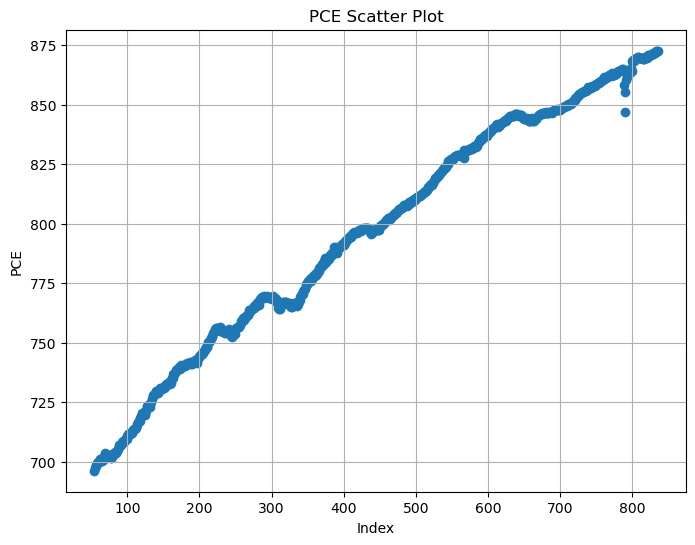

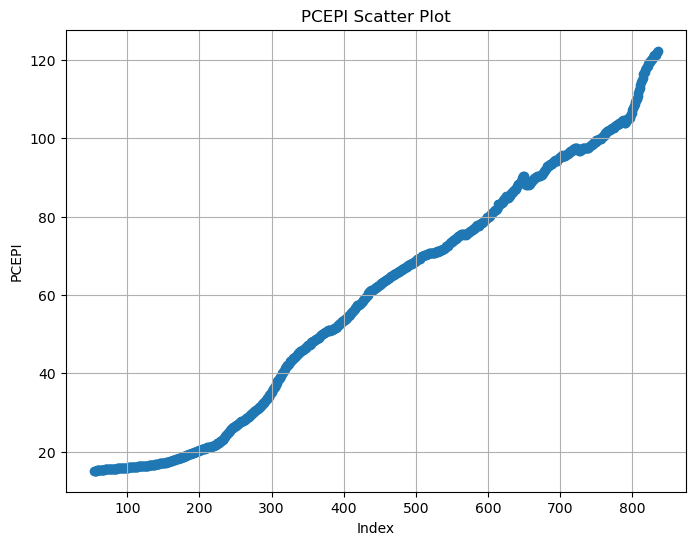

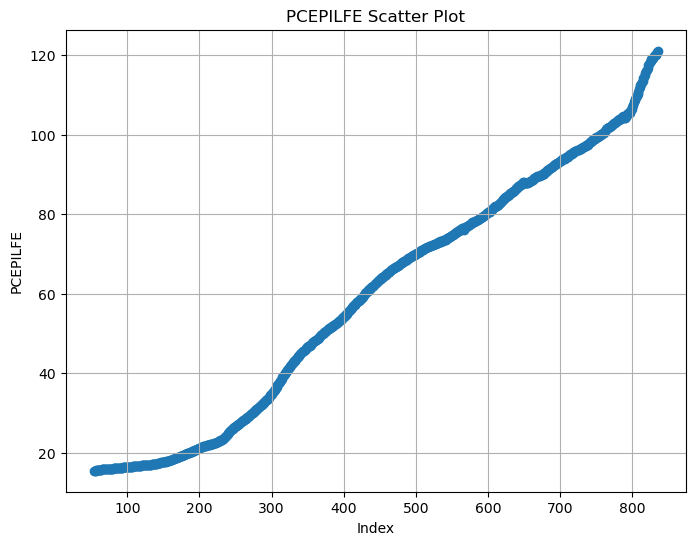

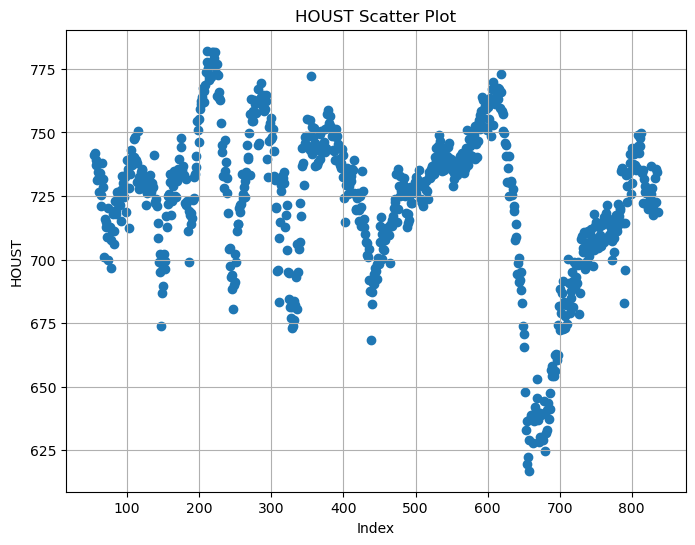

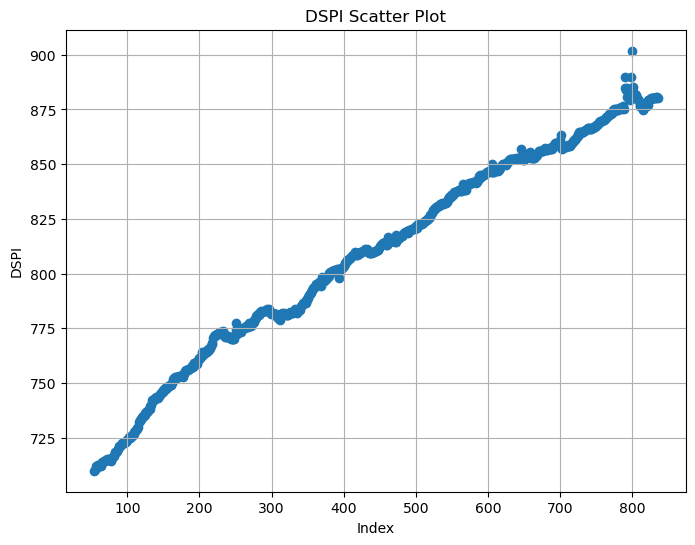

In [1280]:
# visualize the data as a scatter plot
fivefive_columns = ['PCE', 'PCEPI', 'PCEPILFE', 'HOUST', 'DSPI']
for column in fivefive_columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(log_transformed_df[column])), log_transformed_df[column])
    plt.title(f'{column} Scatter Plot')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()


In [1281]:
for column in fivefive_columns:
    print(f"Missing data for {column}:")
    missing_data = log_transformed_df[log_transformed_df[column].isnull()]
    print(missing_data[[column]])  # Display only the column of interest
    print("\n")  # Add a newline for better readability between outputs

Missing data for PCE:
            PCE
Date           
1954-07-01  NaN
1954-08-01  NaN
1954-09-01  NaN
1954-10-01  NaN
1954-11-01  NaN
1954-12-01  NaN
1955-01-01  NaN
1955-02-01  NaN
1955-03-01  NaN
1955-04-01  NaN
1955-05-01  NaN
1955-06-01  NaN
1955-07-01  NaN
1955-08-01  NaN
1955-09-01  NaN
1955-10-01  NaN
1955-11-01  NaN
1955-12-01  NaN
1956-01-01  NaN
1956-02-01  NaN
1956-03-01  NaN
1956-04-01  NaN
1956-05-01  NaN
1956-06-01  NaN
1956-07-01  NaN
1956-08-01  NaN
1956-09-01  NaN
1956-10-01  NaN
1956-11-01  NaN
1956-12-01  NaN
1957-01-01  NaN
1957-02-01  NaN
1957-03-01  NaN
1957-04-01  NaN
1957-05-01  NaN
1957-06-01  NaN
1957-07-01  NaN
1957-08-01  NaN
1957-09-01  NaN
1957-10-01  NaN
1957-11-01  NaN
1957-12-01  NaN
1958-01-01  NaN
1958-02-01  NaN
1958-03-01  NaN
1958-04-01  NaN
1958-05-01  NaN
1958-06-01  NaN
1958-07-01  NaN
1958-08-01  NaN
1958-09-01  NaN
1958-10-01  NaN
1958-11-01  NaN
1958-12-01  NaN
2024-03-01  NaN


Missing data for PCEPI:
            PCEPI
Date             
1954

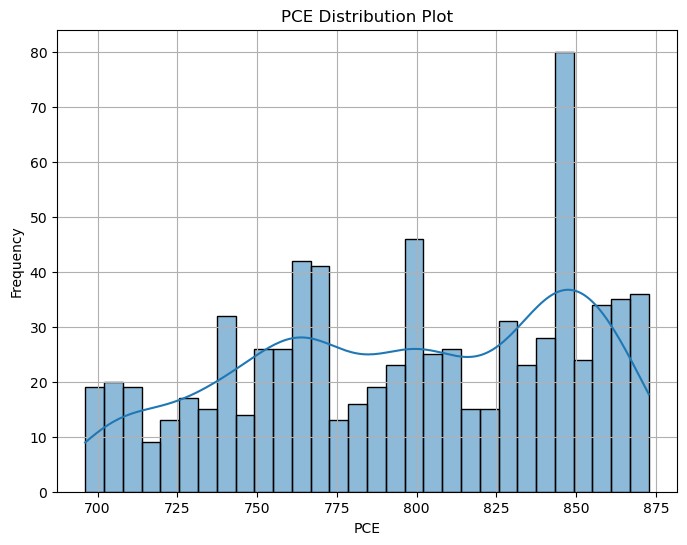

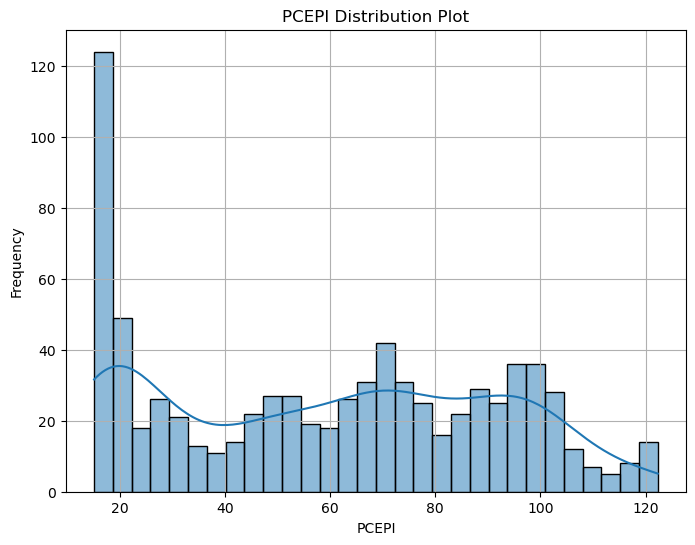

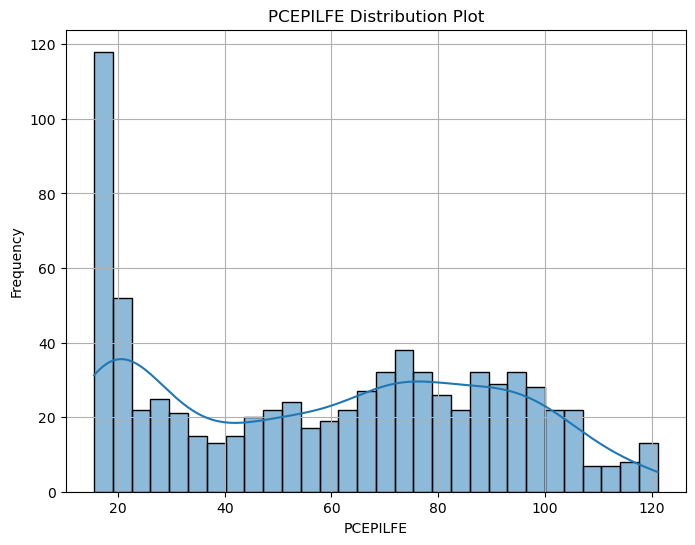

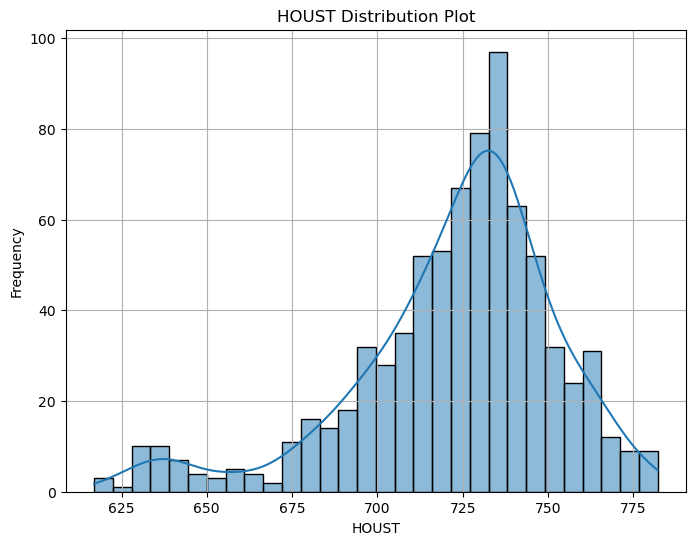

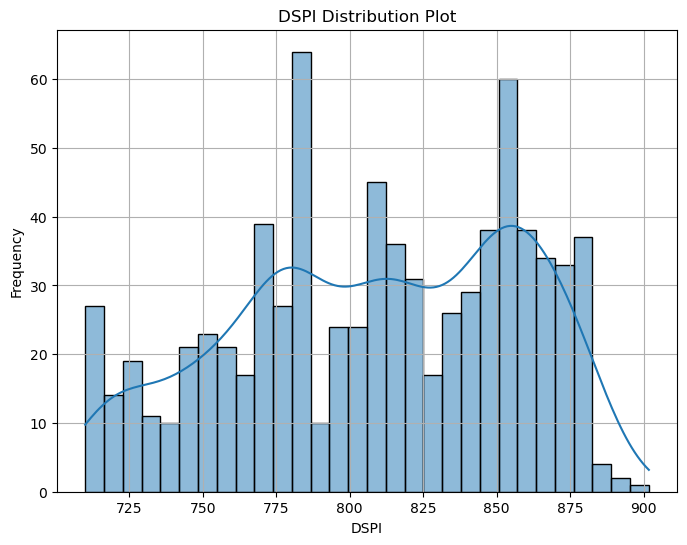

In [1282]:
# create e distribution plot for the columns
for column in fivefive_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(log_transformed_df[column], bins=30, kde=True)
    plt.title(f'{column} Distribution Plot')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [1283]:
# fivefive_columns = ['PCE', 'PCEPI', 'PCEPILFE', 'HOUST', 'DSPI']
# original_data = log_transformed_df

# # DataFrame to store imputed values
# imputed_dataframes = {}

# for column in fivefive_columns:
#     if column in log_transformed_df.columns:
#         imputed_data = impute_missing_values_spline(log_transformed_df, column)
#         # replace the original GDP column with the imputed values
#         log_transformed_df[column] = log_transformed_df[column].combine_first(imputed_data[column])
#         #imputed_dataframes[column] = imputed_data
#         print(f"Imputed {column} - Correlation with original: {log_transformed_df[column].corr(imputed_data[column])}")
#         # Plot original GDP
#         original_plot = original_data[column].hvplot(line_color='blue', width=800, height=400, label=f'Original {column}')

#         # Plot imputed GDP
#         imputed_plot = imputed_data[column].hvplot(line_color='red', width=800, height=400, label=f'Imputed {column}')

#         # Overlay the two plots
#         overlay_plot = original_plot * imputed_plot

#         # Customize the overlay plot with additional options
#         final_plot = overlay_plot.opts(
#             title=f"Original vs. Imputed {column} Data",
#             xlabel='Date',
#             ylabel=column,
#             legend_position='top_left',
#             tools=['pan', 'box_zoom', 'save']
#         )

#         # Display the interactive plot
#         display(final_plot)
#     else:
#         print(f"Column {column} does not exist in DataFrame.")

    

In [1284]:
fivefive_df = log_transformed_df[fivefive_columns]

In [1285]:
# DISPLAY THE ABOVE COLUMNS

for column in fivefive_columns:
    display(fivefive_df[column])  

# check and see whre the NaN values are in the dataset
display(fivefive_df.isnull().sum())


Date
1954-07-01           NaN
1954-08-01           NaN
1954-09-01           NaN
1954-10-01           NaN
1954-11-01           NaN
                 ...    
2023-11-01    872.206840
2023-12-01    872.557926
2024-01-01    872.410090
2024-02-01    872.729613
2024-03-01           NaN
Name: PCE, Length: 837, dtype: float64

Date
1954-07-01        NaN
1954-08-01        NaN
1954-09-01        NaN
1954-10-01        NaN
1954-11-01        NaN
               ...   
2023-11-01    121.296
2023-12-01    121.448
2024-01-01    121.906
2024-02-01    122.312
2024-03-01        NaN
Name: PCEPI, Length: 837, dtype: float64

Date
1954-07-01        NaN
1954-08-01        NaN
1954-09-01        NaN
1954-10-01        NaN
1954-11-01        NaN
               ...   
2023-11-01    120.122
2023-12-01    120.305
2024-01-01    120.849
2024-02-01    121.165
2024-03-01        NaN
Name: PCEPILFE, Length: 837, dtype: float64

Date
1954-07-01           NaN
1954-08-01           NaN
1954-09-01           NaN
1954-10-01           NaN
1954-11-01           NaN
                 ...    
2023-11-01    732.118856
2023-12-01    735.627988
2024-01-01    722.620901
2024-02-01    734.536484
2024-03-01    718.614430
Name: HOUST, Length: 837, dtype: float64

Date
1954-07-01           NaN
1954-08-01           NaN
1954-09-01           NaN
1954-10-01           NaN
1954-11-01           NaN
                 ...    
2023-11-01    880.383097
2023-12-01    880.479267
2024-01-01    880.551603
2024-02-01    880.354181
2024-03-01           NaN
Name: DSPI, Length: 837, dtype: float64

PCE         55
PCEPI       55
PCEPILFE    55
HOUST       54
DSPI        55
dtype: int64

In [1286]:
# It is clear that the data source simply doesn't hold the correct date range, I have decided to cut
# Cut down log_transformed_df start at 1959,01,01, and end at 2024,01,01

cut_logged_dataframe = log_transformed_df.loc['1959-01-01':'2024-01-01']


In [1287]:
display(cut_logged_dataframe.head())  
display(cut_logged_dataframe.tail())
# check and see whre the NaN values are in the dataset
# Display the amount of Nan values in the columns
display(cut_logged_dataframe[Nan_columns].isnull().sum())        
print("We have succesfully removed some more of the Nan values") 

,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,IMPGS,...,HOUST,DSPI,ICS_ALL,DGS2,DGS5,DGS10,AAA,BAA,DTWEXBGS,WTISPLC
Date,,,,,,,,,,,,,,,,,,,,,
1959-01-01,2.48,747.258716,29.01,24.5,29.9,696.144143,458.208607,516.821732,432.470092,430.073358,...,741.276402,709.973930,NaN,NaN,NaN,NaN,4.12,4.87,NaN,3.00
1959-02-01,2.43,748.180681,29.00,24.5,29.9,697.315550,460.313408,517.931389,432.081713,431.735055,...,741.878088,710.405909,NaN,NaN,NaN,NaN,4.14,4.89,NaN,3.00
1959-03-01,2.80,749.039278,28.97,24.6,30.0,698.415364,461.393458,519.068708,431.328977,433.586019,...,739.018143,711.159039,NaN,NaN,NaN,NaN,4.13,4.85,NaN,2.97
1959-04-01,2.96,749.748201,28.98,24.6,30.0,698.220826,461.812933,520.384362,431.937270,435.403320,...,737.148930,711.965574,NaN,NaN,NaN,NaN,4.23,4.86,NaN,2.97
1959-05-01,2.90,749.996320,29.04,24.7,30.1,699.255462,461.560504,521.596895,435.112998,436.430935,...,731.188616,712.343301,95.3,NaN,NaN,NaN,4.37,4.96,NaN,2.97


,FEDFUNDS,GDP,CPIAUCSL,CUSR0000SAH1,CPILFESL,PCE,PRFI,PNFI,EXPGS,IMPGS,...,HOUST,DSPI,ICS_ALL,DGS2,DGS5,DGS10,AAA,BAA,DTWEXBGS,WTISPLC
Date,,,,,,,,,,,,,,,,,,,,,
2023-09-01,5.33,911.789899,307.288,385.370,310.644,871.854469,588.484343,711.224106,691.266983,713.697461,...,721.229447,880.030723,67.8,4.87,4.29,4.18,5.13,6.16,121.1011,89.43
2023-10-01,5.33,911.501711,307.531,386.675,311.390,871.963096,588.037767,711.499776,690.003527,712.862174,...,722.693602,880.173080,63.8,NaN,NaN,NaN,5.61,6.63,NaN,85.64
2023-11-01,5.33,910.603619,308.024,388.398,312.349,872.206840,586.456923,711.978810,686.722658,710.715963,...,732.118856,880.383097,61.3,4.95,4.67,4.77,5.28,6.29,124.0801,77.69
2023-12-01,5.33,909.004756,308.742,389.979,313.209,872.557926,583.542291,712.677693,681.079527,707.019318,...,735.627988,880.479267,69.7,4.56,4.14,4.22,4.74,5.64,120.2542,71.90
2024-01-01,5.33,906.443072,309.685,392.452,314.438,872.410090,578.784577,713.692523,672.116538,701.130930,...,722.620901,880.551603,79.0,NaN,NaN,NaN,4.87,5.68,NaN,74.15


CPILFESL      0
PCE           0
PCEPI         0
PCEPILFE      0
HOUST         0
DSPI          0
ICS_ALL     154
DGS2        413
DGS5        304
DGS10       304
DTWEXBGS    638
dtype: int64

We have succesfully removed some more of the Nan values


# Removing even more NaN values
 

### The rest of the NaN values don't seem to share any numeric pattern, except for the DGS5, and DGS10 columns, which both contain 304 NaN values. DGS2 has 413, while DTWEXBGS has a whopping 638, while ICS_ALL has 154. 

['ICS_ALL', 'DGS2', 'DGS5', 'DGS10', 'DTWEXBGS']

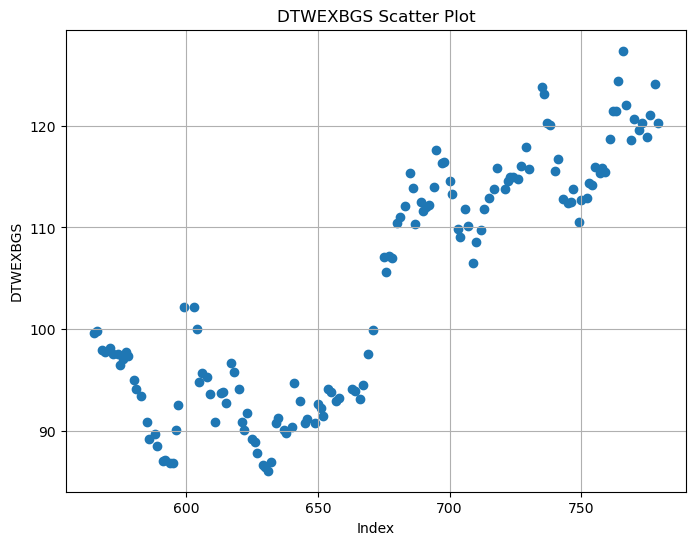

,DTWEXBGS
Date,
1959-01-01,NaN
1959-02-01,NaN
1959-03-01,NaN
1959-04-01,NaN
1959-05-01,NaN
...,...
2023-01-01,NaN
2023-04-01,NaN
2023-07-01,NaN


Date
1959-01-01         NaN
1959-02-01         NaN
1959-03-01         NaN
1959-04-01         NaN
1959-05-01         NaN
                ...   
2023-09-01    121.1011
2023-10-01         NaN
2023-11-01    124.0801
2023-12-01    120.2542
2024-01-01         NaN
Name: DTWEXBGS, Length: 781, dtype: float64

Text(0.5, 0, 'DTWEXBGS')

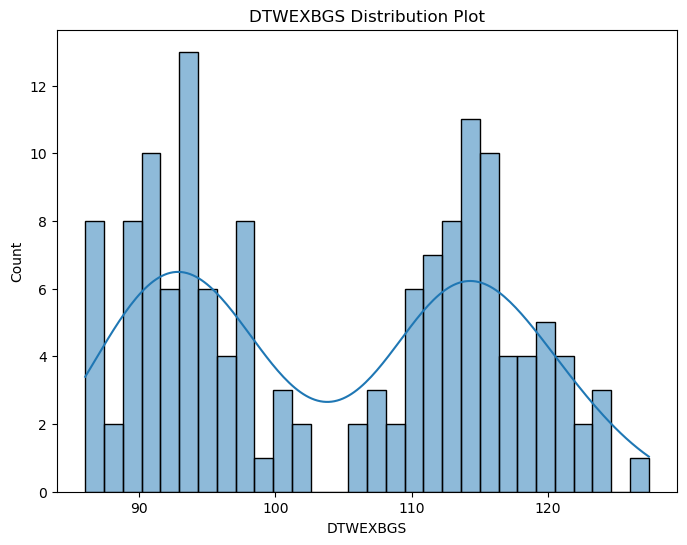

In [1288]:
Nan_columns = find_Nan_columns(cut_logged_dataframe)

# Display the columns that have NaN values
display(Nan_columns)

# Let us begin working on DTWEXBGS
# Plot a scatter plot of the data
plt.figure(figsize=(8, 6))
plt.scatter(range(len(cut_logged_dataframe['DTWEXBGS'])), cut_logged_dataframe['DTWEXBGS'])
plt.title('DTWEXBGS Scatter Plot')

plt.xlabel('Index')

plt.ylabel('DTWEXBGS')

plt.grid(True)

plt.show()

# Check for missing data

missing_data = cut_logged_dataframe[cut_logged_dataframe['DTWEXBGS'].isnull()]

display(missing_data[['DTWEXBGS']])  # Display only the column of interest
display(cut_logged_dataframe['DTWEXBGS'])
# Create a distribution plot for the data

plt.figure(figsize=(8, 6))

sns.histplot(cut_logged_dataframe['DTWEXBGS'], bins=30, kde=True)

plt.title('DTWEXBGS Distribution Plot')

plt.xlabel('DTWEXBGS')



# Dropping DTWEXBGS: The Nominal Broad U.S. Dollar Index,

### We are only dropping to simplify the calculation and also because I don't know of any reliable imputation technique that could be used to impute the data. The data is missing points from 1960-2006, and it is not worth the effort to impute the data. Even if we did, the data would likely be full ofbias and innacuracies. 
### I would have considered changing, only if we were to use the data from 2006-2024. In a segment analysis of the data, we could have used the data from 2006-2024, which may be a next step, before which we will impute the data.
### To prepare for potentially using the data from 2006-2024, we will impute the data using the cubic spline technique.

In [1289]:
column = 'DTWEXBGS'

# Impute missing values using the spline interpolation method
imputed_data[column] = impute_missing_values_spline(cut_logged_dataframe, column)
# Plot original GDP
original_plot = original_data[column].hvplot(line_color='blue', width=800, height=400, label=f'Original {column}')

# Plot imputed GDP
imputed_plot = imputed_data[column].hvplot(line_color='red', width=800, height=400, label=f'Imputed {column}')

# Overlay the two plots
overlay_plot = original_plot * imputed_plot

# Customize the overlay plot with additional options
final_plot = overlay_plot.opts(
    title=f"Original vs. Imputed {column} Data",
    xlabel='Date',
    ylabel=column,
    legend_position='top_left',
    tools=['pan', 'box_zoom', 'save']
)

#Display the interactive plot
display(final_plot)


:Overlay
   .Curve.Original_DTWEXBGS :Curve   [Date]   (DTWEXBGS)
   .Curve.Imputed_DTWEXBGS  :Curve   [Date]   (DTWEXBGS)

In [1290]:
# impute using the spline method

cut_logged_dataframe = impute_missing_values_spline(cut_logged_dataframe, 'DTWEXBGS')

# Display the amount of Nan values in the columns
display(cut_logged_dataframe[Nan_columns].isnull().sum())

# Plot the imputed data
plt.figure(figsize=(12, 6))


ICS_ALL     154
DGS2        413
DGS5        304
DGS10       304
DTWEXBGS      0
dtype: int64

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

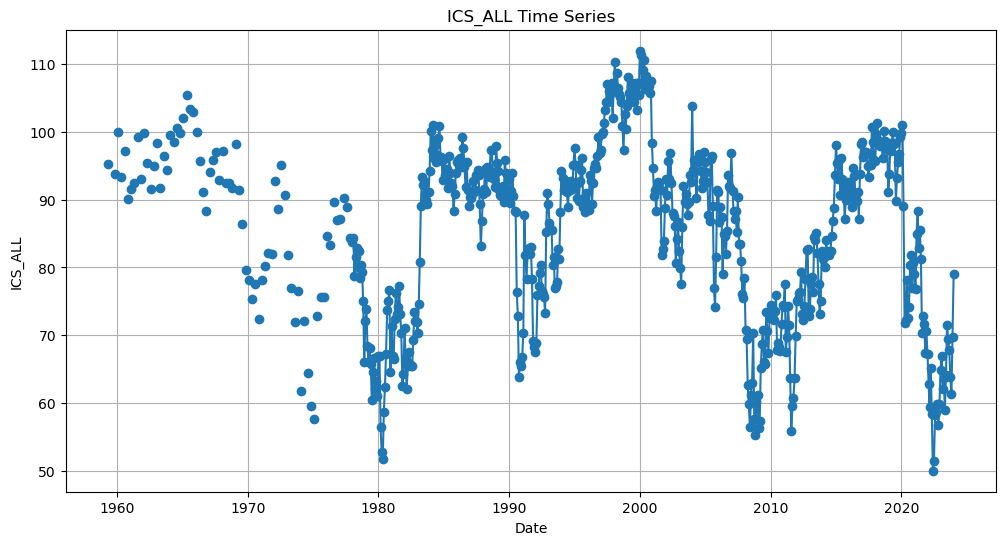

In [1291]:
# Display the ICS_ALL plot:

plt.figure(figsize=(12, 6))

plt.plot(cut_logged_dataframe.index, cut_logged_dataframe['ICS_ALL'], label='ICS_ALL', marker='o', linestyle='-')

plt.title('ICS_ALL Time Series')

plt.xlabel('Date')

plt.ylabel('ICS_ALL')

plt.grid(True)

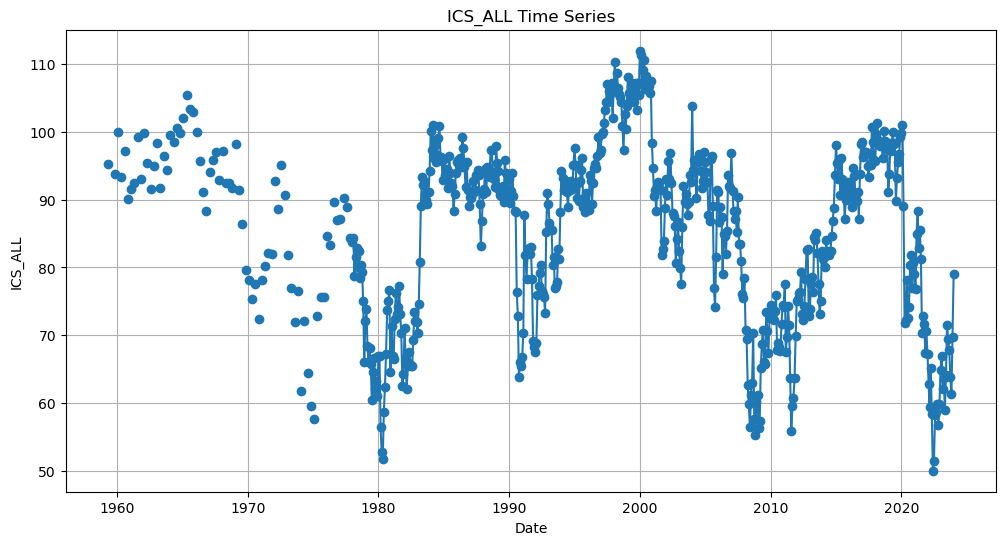

In [1292]:
# Plot ICS_All as a line plot

plt.figure(figsize=(12, 6))

plt.plot(cut_logged_dataframe.index, cut_logged_dataframe['ICS_ALL'], label='ICS_ALL', marker='o', linestyle='-')

# display the date distribution of the data

plt.title('ICS_ALL Time Series')

plt.xlabel('Date')


plt.ylabel('ICS_ALL')

plt.grid(True)


## Removing NaN values: 

### It is critical that we remove NaN vaues, -- we will be holistically evaluating the data. We will start with ensuring that NaN values are not simply removed, but are replaced with either the mean of the column, or with new values based on predictive imputation. *We will be using the latter, as it is more accurate.*

# MAIN QUESTIONS:

1) Should I Remove columns such as 'DTWEXBGS' and 'ICS_ALL' that have a large number of NaN values? Would they